# Data Prep for RNN

In [126]:
import pandas as pd
import numpy as np

In [127]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## load data

In [128]:
md = pd.read_csv("../datasets/model_data.csv") 
md = md.sort_values(by = 'date')
md

,Unnamed: 0,date,sentiment,open,high,low,close,polarity
99,711,2022-01-04,2,396.516663,402.666656,374.350006,383.196655,down
98,710,2022-01-04,0,396.516663,402.666656,374.350006,383.196655,down
97,708,2022-01-04,1,396.516663,402.666656,374.350006,383.196655,down
96,701,2022-01-05,2,382.216675,390.113342,360.336670,362.706665,down
95,700,2022-01-05,1,382.216675,390.113342,360.336670,362.706665,down
...,...,...,...,...,...,...,...,...
4,13,2022-03-03,1,292.923340,295.480011,277.533325,279.763336,down
3,12,2022-03-03,0,292.923340,295.480011,277.533325,279.763336,down
2,4,2022-03-04,2,283.033325,285.216675,275.053345,279.429993,down
1,1,2022-03-04,1,283.033325,285.216675,275.053345,279.429993,down


In [129]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
md['polarity'] = labelencoder.fit_transform(md['polarity'])

## Drop unwanted columns

In [130]:
md = md.drop(['Unnamed: 0','date'],axis=1)
md.head()

,sentiment,open,high,low,close,polarity
99,2,396.516663,402.666656,374.350006,383.196655,0
98,0,396.516663,402.666656,374.350006,383.196655,0
97,1,396.516663,402.666656,374.350006,383.196655,0
96,2,382.216675,390.113342,360.336670,362.706665,0
95,1,382.216675,390.113342,360.336670,362.706665,0


## Dataframe to array

In [131]:
df = md.to_numpy()
df[:10]

array([[  2.      , 396.516663, 402.666656, 374.350006, 383.196655,
          0.      ],
       [  0.      , 396.516663, 402.666656, 374.350006, 383.196655,
          0.      ],
       [  1.      , 396.516663, 402.666656, 374.350006, 383.196655,
          0.      ],
       [  2.      , 382.216675, 390.113342, 360.33667 , 362.706665,
          0.      ],
       [  1.      , 382.216675, 390.113342, 360.33667 , 362.706665,
          0.      ],
       [  1.      , 359.      , 362.666656, 340.166656, 354.899994,
          0.      ],
       [  2.      , 359.      , 362.666656, 340.166656, 354.899994,
          0.      ],
       [  2.      , 360.123322, 360.309998, 336.666656, 342.320007,
          0.      ],
       [  1.      , 360.123322, 360.309998, 336.666656, 342.320007,
          0.      ],
       [  1.      , 333.333344, 353.033325, 326.666656, 352.706665,
          1.      ]])

In [132]:
df.shape

(100, 6)

In [133]:
df[0:3,:]

array([[  2.      , 396.516663, 402.666656, 374.350006, 383.196655,
          0.      ],
       [  0.      , 396.516663, 402.666656, 374.350006, 383.196655,
          0.      ],
       [  1.      , 396.516663, 402.666656, 374.350006, 383.196655,
          0.      ]])

In [134]:
def create_sequences(data, seq_length):
    obs = []
    print(obs)    
    for i in range(len(data)-seq_length-1):
        obs.append(data[i:(i+seq_length)])
    return np.array(obs)

In [135]:
RNN_input = create_sequences(df, 2)
RNN_input

[]


array([[[  2.      , 396.516663, 402.666656, 374.350006, 383.196655,
           0.      ],
        [  0.      , 396.516663, 402.666656, 374.350006, 383.196655,
           0.      ]],

       [[  0.      , 396.516663, 402.666656, 374.350006, 383.196655,
           0.      ],
        [  1.      , 396.516663, 402.666656, 374.350006, 383.196655,
           0.      ]],

       [[  1.      , 396.516663, 402.666656, 374.350006, 383.196655,
           0.      ],
        [  2.      , 382.216675, 390.113342, 360.33667 , 362.706665,
           0.      ]],

       ...,

       [[  2.      , 292.92334 , 295.480011, 277.533325, 279.763336,
           0.      ],
        [  1.      , 292.92334 , 295.480011, 277.533325, 279.763336,
           0.      ]],

       [[  1.      , 292.92334 , 295.480011, 277.533325, 279.763336,
           0.      ],
        [  0.      , 292.92334 , 295.480011, 277.533325, 279.763336,
           0.      ]],

       [[  0.      , 292.92334 , 295.480011, 277.533325, 279.763336

In [136]:
y = RNN_input[:,-1,5] 
y[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1.])

In [137]:
X = RNN_input[:,0:1,0:6] 
X[:10]

array([[[  2.      , 396.516663, 402.666656, 374.350006, 383.196655,
           0.      ]],

       [[  0.      , 396.516663, 402.666656, 374.350006, 383.196655,
           0.      ]],

       [[  1.      , 396.516663, 402.666656, 374.350006, 383.196655,
           0.      ]],

       [[  2.      , 382.216675, 390.113342, 360.33667 , 362.706665,
           0.      ]],

       [[  1.      , 382.216675, 390.113342, 360.33667 , 362.706665,
           0.      ]],

       [[  1.      , 359.      , 362.666656, 340.166656, 354.899994,
           0.      ]],

       [[  2.      , 359.      , 362.666656, 340.166656, 354.899994,
           0.      ]],

       [[  2.      , 360.123322, 360.309998, 336.666656, 342.320007,
           0.      ]],

       [[  1.      , 360.123322, 360.309998, 336.666656, 342.320007,
           0.      ]],

       [[  1.      , 333.333344, 353.033325, 326.666656, 352.706665,
           1.      ]]])

## split data

In [138]:
split_point = int(len(X)*0.7)
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

In [139]:
X_train[:10]

array([[[  2.      , 396.516663, 402.666656, 374.350006, 383.196655,
           0.      ]],

       [[  0.      , 396.516663, 402.666656, 374.350006, 383.196655,
           0.      ]],

       [[  1.      , 396.516663, 402.666656, 374.350006, 383.196655,
           0.      ]],

       [[  2.      , 382.216675, 390.113342, 360.33667 , 362.706665,
           0.      ]],

       [[  1.      , 382.216675, 390.113342, 360.33667 , 362.706665,
           0.      ]],

       [[  1.      , 359.      , 362.666656, 340.166656, 354.899994,
           0.      ]],

       [[  2.      , 359.      , 362.666656, 340.166656, 354.899994,
           0.      ]],

       [[  2.      , 360.123322, 360.309998, 336.666656, 342.320007,
           0.      ]],

       [[  1.      , 360.123322, 360.309998, 336.666656, 342.320007,
           0.      ]],

       [[  1.      , 333.333344, 353.033325, 326.666656, 352.706665,
           1.      ]]])

In [140]:
y_train = y_train.reshape(-1,1)
y_train[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.]])

In [141]:
y_test = y_test.reshape(-1,1)

In [142]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(67, 1, 6)
(30, 1, 6)
(67, 1)
(30, 1)


## Scale the data

## Fit the data to a Recurrent neural network

LSTM

In [143]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding

lstm = Sequential()
lstm.add(LSTM(units=128))
lstm.add(Dense(units=1, activation='sigmoid'))

In [144]:
np.random.seed(42)
tf.random.set_seed(42)

lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [145]:
lstm.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,validation_data=(X_test, y_test) )

Epoch 1/100
3/3 [==============================] - 2s 215ms/step - loss: 0.6885 - accuracy: 0.5672 - val_loss: 0.6493 - val_accuracy: 0.6000
Epoch 2/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6604 - accuracy: 0.6119 - val_loss: 0.6495 - val_accuracy: 0.6000
Epoch 3/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6668 - accuracy: 0.5672 - val_loss: 0.6385 - val_accuracy: 0.6000
Epoch 4/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6620 - accuracy: 0.5672 - val_loss: 0.6310 - val_accuracy: 0.6000
Epoch 5/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6401 - accuracy: 0.6418 - val_loss: 0.6398 - val_accuracy: 0.7667
Epoch 6/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6608 - accuracy: 0.7463 - val_loss: 0.6524 - val_accuracy: 0.8333
Epoch 7/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6611 - accuracy: 0.7015 - val_loss: 0.6349 - val_accuracy: 0.6667
Epoch 8/100
3/3 [==

In [146]:
lstm.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 128)               69120     
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 69,249
Trainable params: 69,249
Non-trainable params: 0
_________________________________________________________________


Let's now investigate the predictions of our model.

In [147]:
y_pred = lstm.predict(X_test)
y_pred[:10]

1/1 [==============================] - 0s 318ms/step


array([[0.32573098],
       [0.32467875],
       [0.32369533],
       [0.4322991 ],
       [0.43409705],
       [0.4589001 ],
       [0.4608729 ],
       [0.44029823],
       [0.4383854 ],
       [0.33688262]], dtype=float32)

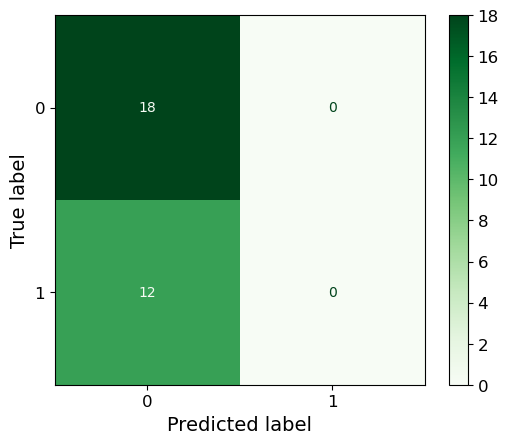

In [148]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
c = confusion_matrix(y_test, np.round(y_pred))
disp = ConfusionMatrixDisplay(c)
disp.plot(cmap='Greens')

In [149]:
from sklearn.metrics import classification_report
print(classification_report(y_test,np.round(y_pred)))

              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75        18
         1.0       0.00      0.00      0.00        12

    accuracy                           0.60        30
   macro avg       0.30      0.50      0.37        30
weighted avg       0.36      0.60      0.45        30



c:\Users\mukes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mukes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mukes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [114]:
performance = pd.DataFrame({"model": [], "MSE": []})

In [116]:
results = pd.DataFrame()

results['actual'] = y_test.flatten()
results['predicted'] = y_pred.flatten()
results['residual'] = results['actual'] - results['predicted']

results

,actual,predicted,residual
0,0.0,0.433610,-0.433610
1,0.0,0.433610,-0.433610
2,1.0,0.433609,0.566391
3,1.0,0.433618,0.566382
4,1.0,0.433618,0.566382
5,1.0,0.433613,0.566387
6,1.0,0.433613,0.566387
7,1.0,0.433614,0.566386
8,0.0,0.433613,-0.433613
9,0.0,0.433611,-0.433611


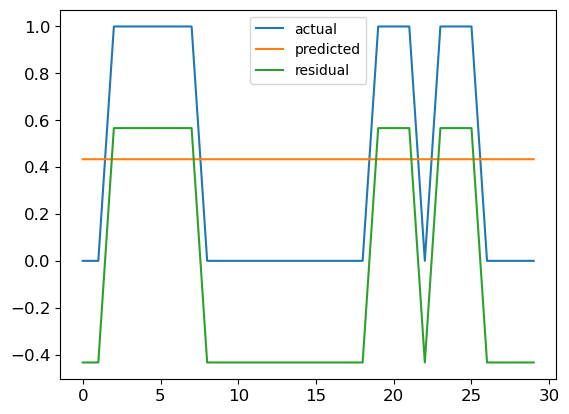

In [117]:
from matplotlib import pyplot as plt

plt.plot(results['actual'], label = 'actual')
plt.plot(results['predicted'], label = 'predicted')
plt.plot(results['residual'], label = 'residual')

plt.legend()

plt.show()

In [214]:
lstm_mse = mean_squared_error(results['actual'], results['predicted'])
lstm_mse

0.7925671076436855

In [215]:
performance = pd.concat([performance, pd.DataFrame({'model':"Lstm RNN", 'MSE': lstm_mse}, index=[0])])
performance

,model,MSE
0,Lstm RNN,0.792567


GRU

In [216]:
Gru = keras.models.Sequential([
    keras.layers.GRU(32, activation='tanh', return_sequences=True, input_shape=[3, 4]),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [217]:
np.random.seed(42)
tf.random.set_seed(42)

Gru.compile(loss="mse", optimizer='RMSprop')

In [218]:
Gru.summary() 

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_10 (GRU)                (None, 3, 32)             3648      
                                                                 
 gru_11 (GRU)                (None, 32)                6336      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 10,017
Trainable params: 10,017
Non-trainable params: 0
_________________________________________________________________


fit to Gru

In [219]:
Gru.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
244/244 [==============================] - 3s 3ms/step - loss: 384.4064
Epoch 2/100
244/244 [==============================] - 1s 3ms/step - loss: 19.8369
Epoch 3/100
244/244 [==============================] - 1s 2ms/step - loss: 17.3790
Epoch 4/100
244/244 [==============================] - 1s 2ms/step - loss: 14.3958
Epoch 5/100
244/244 [==============================] - 1s 2ms/step - loss: 13.2050
Epoch 6/100
244/244 [==============================] - 1s 2ms/step - loss: 11.6844
Epoch 7/100
244/244 [==============================] - 1s 3ms/step - loss: 9.7228
Epoch 8/100
244/244 [==============================] - 1s 2ms/step - loss: 8.7838
Epoch 9/100
244/244 [==============================] - 1s 3ms/step - loss: 8.4559
Epoch 10/100
244/244 [==============================] - 1s 3ms/step - loss: 8.1279
Epoch 11/100
244/244 [==============================] - 1s 3ms/step - loss: 7.6539
Epoch 12/100
244/244 [==============================] - 1s 3ms/step - loss: 6.6012
Epoch 

Let's now investigate the predictions of our model.

In [220]:
y_pred = Gru.predict(X_test)
y_pred[:10]

4/4 [==============================] - 1s 2ms/step


array([[46.947865],
       [46.462074],
       [46.241875],
       [46.058693],
       [46.230644],
       [46.859512],
       [47.018147],
       [47.228718],
       [47.260406],
       [47.039825]], dtype=float32)

In [221]:
results = pd.DataFrame()

results['actual'] = y_test.flatten()
results['predicted'] = y_pred.flatten()
results['residual'] = results['actual'] - results['predicted']

results

,actual,predicted,residual
0,46.709999,46.947865,-0.237866
1,46.209999,46.462074,-0.252075
2,45.990002,46.241875,-0.251873
3,46.500000,46.058693,0.441307
4,46.840000,46.230644,0.609356
...,...,...,...
100,39.189999,40.234879,-1.044880
101,39.660000,39.934837,-0.274837
102,39.639999,40.393242,-0.753243
103,41.299999,40.428322,0.871677


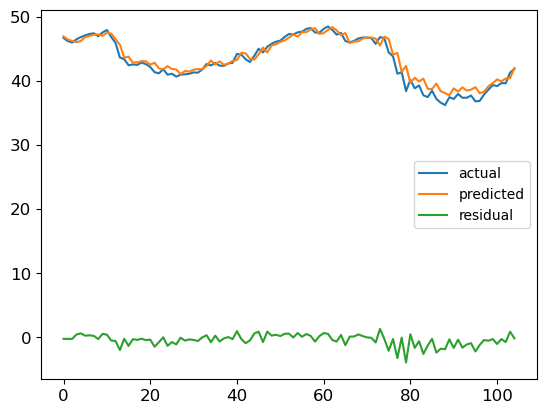

In [222]:
from matplotlib import pyplot as plt

plt.plot(results['actual'], label = 'actual')
plt.plot(results['predicted'], label = 'predicted')
plt.plot(results['residual'], label = 'residual')

plt.legend()

plt.show()

In [223]:
gru_mse = mean_squared_error(results['actual'], results['predicted'])
gru_mse

0.9664720868796065

In [224]:
performance = pd.concat([performance, pd.DataFrame({'model':"GRU RNN", 'MSE': gru_mse}, index=[0])])
performance

,model,MSE
0,Lstm RNN,0.792567
0,GRU RNN,0.966472


In [225]:
performance.sort_values(by='MSE')

,model,MSE
0,Lstm RNN,0.792567
0,GRU RNN,0.966472


From the above results we can say that mean squared error is less for LSTM model than GRU .so Lstm is better performing than GRU. Even from the graphs we see that Lstm has better results than GRU.